In [1]:
import pandas as pd
import os
import numpy as np

In [2]:
files=[file for file in os.listdir('./Sales_Data')]
all_Data=pd.DataFrame()
for file in files:
    df=pd.read_csv('./Sales_Data/'+file)
    all_Data=pd.concat([all_Data,df])
all_Data.to_csv("all_Data1.csv",index=False)

In [3]:
all_Data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [4]:
all_Data.dropna(inplace=True)

In [5]:
t=all_Data[all_Data['Quantity Ordered']=='Quantity Ordered']

In [6]:
t.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [7]:
all1=all_Data

In [8]:
all1.set_index('Order ID',inplace=True)

In [9]:
all1.drop('Order ID',inplace=True)

In [10]:
all1.shape

(185950, 5)

In [11]:
all2=all1.copy()

In [12]:
all2.head()

,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
Order ID,,,,,
176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [13]:
all2.reset_index(inplace=True)

In [14]:
all2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
2,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [15]:
all2.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [16]:
all2=all2.astype({'Quantity Ordered':int})

In [17]:
all2.dtypes

Order ID            object
Product             object
Quantity Ordered     int32
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [18]:
all2['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [19]:
all2=all2.astype({'Price Each':float})

In [20]:
all2.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [21]:
all2['Time_of_order']=all2['Order Date'].apply(lambda x:x.split()[1])

In [22]:
all2['Order Date']=all2['Order Date'].apply(lambda x:x.split()[0])

In [23]:
all2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order
0,176558,USB-C Charging Cable,2,11.95,04/19/19,"917 1st St, Dallas, TX 75001",08:46
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19,"682 Chestnut St, Boston, MA 02215",22:30
2,176560,Google Phone,1,600.00,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
3,176560,Wired Headphones,1,11.99,04/12/19,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176561,Wired Headphones,1,11.99,04/30/19,"333 8th St, Los Angeles, CA 90001",09:27


In [24]:
all2['Order Date']=pd.to_datetime(all2['Order Date'])

In [25]:
all2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27


In [26]:
all2.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Time_of_order               object
dtype: object

In [27]:
all2['Month']=pd.DatetimeIndex(all2['Order Date']).month

# IMPORTANT

In [28]:
all2['Month'] = pd.to_datetime(all2['Month'], format='%m').dt.month_name()

In [29]:
all2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April


In [30]:
all2.dtypes

Order ID                    object
Product                     object
Quantity Ordered             int32
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
Time_of_order               object
Month                       object
dtype: object

In [31]:
all3=all2

In [32]:
all3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April


In [33]:
all3['Sales']=all3['Price Each']*all3['Quantity Ordered']

In [34]:
all3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April,99.99
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April,11.99


In [35]:
t=all3.groupby('Month')['Sales'].sum()

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls
import cufflinks as cf
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

# SEEING THE SALES

In [37]:
t.iplot(kind='bar')

In [38]:
all3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April,23.90
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April,99.99
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,600.00
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,11.99
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April,11.99


In [39]:
all3['City']=all3['Purchase Address'].apply(lambda x:x.split(',')[1])

In [40]:
all3['State']=all3['Purchase Address'].apply(lambda x:x.split(',')[2])

In [41]:
all3['Postal_code']=all3['State'].apply(lambda x:x.split()[1])

In [42]:
all3['State']=all3['State'].apply(lambda x:x.split()[0])

In [43]:
all3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month,Sales,City,State,Postal_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April,23.90,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April,99.99,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,600.00,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,11.99,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April,11.99,Los Angeles,CA,90001


In [44]:
by_state=all3.groupby('State')['Sales'].sum()

In [45]:
by_state.iplot(kind='bar')

In [46]:
all3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month,Sales,City,State,Postal_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April,23.90,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April,99.99,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,600.00,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,11.99,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April,11.99,Los Angeles,CA,90001


# In general what time has the most sale

In [47]:
by_time=all3.groupby('Time_of_order')['Sales'].sum()

In [48]:
by_time.iplot()

# Which city at what time has most sale

In [49]:
byCity_time=all3.groupby(['City','Time_of_order'])['Sales'].sum()

In [50]:
byCity_time.iplot(color='yellow')

In [51]:
all3['Product'].unique()

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [52]:
all3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month,Sales,City,State,Postal_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April,23.90,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April,99.99,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,600.00,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,11.99,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April,11.99,Los Angeles,CA,90001


# WHAT PRODUCT DID MAXIMUM SALES IN WHICH MONTH

DOUBT HERE PRODUCT ANALYSIS

In [53]:
prod_sal=all3[['Month','Product','Sales']]

In [54]:
prod_sal.head()

,Month,Product,Sales
0,April,USB-C Charging Cable,23.90
1,April,Bose SoundSport Headphones,99.99
2,April,Google Phone,600.00
3,April,Wired Headphones,11.99
4,April,Wired Headphones,11.99


In [55]:
prod_sal.groupby(['Month','Product'])['Sales'].sum()

Month      Product                   
April      20in Monitor                   43226.07
           27in 4K Gaming Monitor        220734.34
           27in FHD Monitor              110392.64
           34in Ultrawide Monitor        248513.46
           AA Batteries (4-pack)          10832.64
           AAA Batteries (4-pack)          8787.61
           Apple Airpods Headphones      227850.00
           Bose SoundSport Headphones    128687.13
           Flatscreen TV                 138000.00
           Google Phone                  348000.00
           LG Dryer                       46800.00
           LG Washing Machine             36600.00
           Lightning Charging Cable       35476.35
           Macbook Pro Laptop            771800.00
           ThinkPad Laptop               389996.10
           USB-C Charging Cable           27114.55
           Vareebadd Phone                88000.00
           Wired Headphones               24759.35
           iPhone                        485

In [56]:
prod1=prod_sal.groupby(['Month','Product'])['Sales'].sum().reset_index()

In [57]:
prod1.head(30)

,Month,Product,Sales
0,April,20in Monitor,43226.07
1,April,27in 4K Gaming Monitor,220734.34
2,April,27in FHD Monitor,110392.64
3,April,34in Ultrawide Monitor,248513.46
4,April,AA Batteries (4-pack),10832.64
5,April,AAA Batteries (4-pack),8787.61
6,April,Apple Airpods Headphones,227850.00
7,April,Bose SoundSport Headphones,128687.13
8,April,Flatscreen TV,138000.00
9,April,Google Phone,348000.00


# Testing for one month

In [58]:
prod1[prod1['Month']=='April'].loc[prod1[prod1['Month']=='April']['Sales']==prod1[prod1['Month']=='April']['Sales'].max()]

,Month,Product,Sales
13,April,Macbook Pro Laptop,771800.0


In [59]:
l1=['April', 'May', 'August', 'September', 'December', 'January',
       'February', 'March', 'July', 'June', 'November', 'October']
df2=pd.DataFrame()
df3=pd.DataFrame()
for i in l1:
    df2=prod1[prod1['Month']==i].loc[prod1[prod1['Month']==i]['Sales']==prod1[prod1['Month']==i]['Sales'].max()]
    df3=pd.concat([df2,df3])


In [60]:
df3

,Month,Product,Sales
203,October,Macbook Pro Laptop,892500.0
184,November,Macbook Pro Laptop,748000.0
127,June,Macbook Pro Laptop,605200.0
108,July,Macbook Pro Laptop,625600.0
146,March,Macbook Pro Laptop,644300.0
70,February,Macbook Pro Laptop,469200.0
89,January,Macbook Pro Laptop,399500.0
51,December,Macbook Pro Laptop,1093100.0
222,September,Macbook Pro Laptop,489600.0
32,August,Macbook Pro Laptop,508300.0


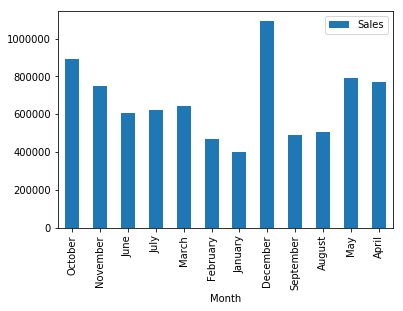

In [61]:
df3.plot(x='Month',y='Sales',kind='bar')

# WHich product had the most sales in which city

In [66]:
all3.groupby(['State','Product'])['Sales'].sum()

State  Product                   
CA     20in Monitor                   182363.42
       27in 4K Gaming Monitor         960545.37
       27in FHD Monitor               455519.63
       34in Ultrawide Monitor         912355.99
       AA Batteries (4-pack)           42213.12
       AAA Batteries (4-pack)          37001.25
       Apple Airpods Headphones       930900.00
       Bose SoundSport Headphones     544145.58
       Flatscreen TV                  564300.00
       Google Phone                  1323600.00
       LG Dryer                       155400.00
       LG Washing Machine             171000.00
       Lightning Charging Cable       139468.55
       Macbook Pro Laptop            3207900.00
       ThinkPad Laptop               1603983.96
       USB-C Charging Cable           115628.20
       Vareebadd Phone                324400.00
       Wired Headphones                98749.64
       iPhone                        1945300.00
GA     20in Monitor                    37616.58
      

In [69]:
h1=all3.groupby(['State','Product'])['Sales'].sum().reset_index()

# Trying for one state

In [82]:
h1[h1['State']=='CA'].loc[h1[h1['State']=='CA']['Sales']==h1[h1['State']=='CA']['Sales'].max()]

,State,Product,Sales
13,CA,Macbook Pro Laptop,3207900.0


In [84]:
all3['State'].unique()

array(['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME'], dtype=object)

In [87]:
l2=['TX', 'MA', 'CA', 'WA', 'GA', 'NY', 'OR', 'ME']
df4=pd.DataFrame()
df5=pd.DataFrame()
for i in l2:
    df4=h1[h1['State']==i].loc[h1[h1['State']==i]['Sales']==h1[h1['State']==i]['Sales'].max()]
    df5=pd.concat([df4,df5])

In [88]:
df5

,State,Product,Sales
70,ME,Macbook Pro Laptop,107100.0
108,OR,Macbook Pro Laptop,465800.0
89,NY,Macbook Pro Laptop,1116900.0
32,GA,Macbook Pro Laptop,644300.0
146,WA,Macbook Pro Laptop,605200.0
13,CA,Macbook Pro Laptop,3207900.0
51,MA,Macbook Pro Laptop,814300.0
127,TX,Macbook Pro Laptop,1076100.0


In [94]:
df5.iplot(x='State',y='Sales',kind='bar',color='green')

In [95]:
all3.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Time_of_order,Month,Sales,City,State,Postal_code
0,176558,USB-C Charging Cable,2,11.95,2019-04-19,"917 1st St, Dallas, TX 75001",08:46,April,23.90,Dallas,TX,75001
1,176559,Bose SoundSport Headphones,1,99.99,2019-04-07,"682 Chestnut St, Boston, MA 02215",22:30,April,99.99,Boston,MA,02215
2,176560,Google Phone,1,600.00,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,600.00,Los Angeles,CA,90001
3,176560,Wired Headphones,1,11.99,2019-04-12,"669 Spruce St, Los Angeles, CA 90001",14:38,April,11.99,Los Angeles,CA,90001
4,176561,Wired Headphones,1,11.99,2019-04-30,"333 8th St, Los Angeles, CA 90001",09:27,April,11.99,Los Angeles,CA,90001


# Average price of product ordered in each state

In [100]:
h2=all3.groupby('State')['Price Each'].mean().reset_index()

In [106]:
h2.iplot(x='State',y='Price Each',color='red',kind='scatter',mode='markers')